### Task 1 
Implement the NOT Boolean logic gate using perceptron Neural Network. Inputs = x1, x2 and 
bias, weights should be fed into the perceptron with single Output = y. Display final weights 
and bias of each perceptron

In [112]:
import numpy as np
import tensorflow as tf

In [113]:
X,y = np.array([
    [0, 1],
    [1, 0]
])
w1 = 1
w2 = -2
b = 1
X,y

(array([0, 1]), array([1, 0]))

In [114]:
def step(z):
    return 1 if z>=1 else 0

In [115]:
for i in range(X.shape[0]):
    z = w1*X[i] + w2*X[i] + b
    print(f"Input: {X[i]} → Output:", step(z))

Input: 0 → Output: 1
Input: 1 → Output: 0


#### Using the updating weights and bias approach:

In [116]:
w = np.random.rand(1)
b = np.random.rand(1)

epochs = 100
learning_rate = 0.1

for epoch in range(epochs):
    for i in range(X.shape[0]):
        z = np.dot(w, X[i]) + b
        y_pred = step(z)
        error = y[i] - y_pred
        w += learning_rate * error * X[i]
        b += learning_rate * error

print("Trained weights:", w)
print("Trained bias:", b)


Trained weights: [-0.10659023]
Trained bias: [1.04670623]


In [117]:
print("\nPredictions:")
for i in range(len(X)):
    z = np.dot(w, X[i]) + b
    print(f"Input: {X[i]} → Output:", step(z))


Predictions:
Input: 0 → Output: 1
Input: 1 → Output: 0


### Task 2 
1. Use the Iris Dataset  
2. Create an Auto Encoder and fit it with our data using 3 neurons in the dense layer 
3. Display new reduced dimension values 
4. Plot loss for different encoders 

In [118]:
import pandas as pd

In [119]:
from sklearn.datasets import load_iris
X = load_iris().data

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [123]:
autoencoder = Sequential([
    Input(shape = (X.shape[1], )),
    Dense(3, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

In [124]:
autoencoder.compile(optimizer='adam', loss='mse')

In [125]:
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5463 - val_loss: 0.6187
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5356 - val_loss: 0.6109
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5247 - val_loss: 0.6034
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5138 - val_loss: 0.5959
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5032 - val_loss: 0.5887
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4928 - val_loss: 0.5814
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4824 - val_loss: 0.5745
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4719 - val_loss: 0.5671
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4618 - val_loss: 0.5606
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4518 - val_loss: 0.5546
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4422 - val_loss: 0.5479
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4325 - val_loss: 0.5416
Epoch 13/50


In [126]:
encoder  =Sequential([autoencoder.layers[0]])
encoded_data = encoder.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


The reduced dimention values are as follows:

In [127]:
encoded_data

array([[0.9406513 , 0.        , 0.        ],
       [0.32772845, 0.        , 0.        ],
       [0.5817579 , 0.        , 0.        ],
       [0.40021795, 0.        , 0.        ],
       [1.0539247 , 0.        , 0.        ],
       [1.3686391 , 0.        , 0.        ],
       [0.7928662 , 0.        , 0.        ],
       [0.78659374, 0.        , 0.        ],
       [0.1745504 , 0.        , 0.        ],
       [0.41477722, 0.        , 0.        ],
       [1.1729696 , 0.        , 0.        ],
       [0.74580973, 0.        , 0.        ],
       [0.31568468, 0.        , 0.        ],
       [0.36487836, 0.        , 0.        ],
       [1.6417928 , 0.        , 0.        ],
       [2.0431776 , 0.        , 0.        ],
       [1.478569  , 0.        , 0.        ],
       [0.9460442 , 0.        , 0.        ],
       [1.2632741 , 0.        , 0.        ],
       [1.2783345 , 0.        , 0.        ],
       [0.7582318 , 0.        , 0.        ],
       [1.1638032 , 0.        , 0.        ],
       [1.

In [128]:
preds = []
loss = []
for i in range(1,5):
    autoencoder = Sequential([
        Input(shape = (X.shape[1], )),
        Dense(i, activation='relu'),
        Dense(X.shape[1], activation='sigmoid')
    ])
    autoencoder.compile(optimizer='adam', loss='mse')
    history = autoencoder.fit(X_scaled, X_scaled, epochs=20, batch_size=16, shuffle=True, validation_split=0.2)
    preds.append(autoencoder.predict(X_scaled))
    loss.append(history.history['loss'])
    print(f'Encoding Dimension: {i}, Loss: {loss[-1]}')

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3208 - val_loss: 0.5423
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3146 - val_loss: 0.5431
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3084 - val_loss: 0.5439
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3022 - val_loss: 0.5448
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2958 - val_loss: 0.5456
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2899 - val_loss: 0.5465
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2835 - val_loss: 0.5474
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2773 - val_loss: 0.5482
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2712 - val_loss: 0.5490
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2652 - val_loss: 0.5497
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2593 - val_loss: 0.5505
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2534 - val_loss: 0.5513
Epoch 13/20


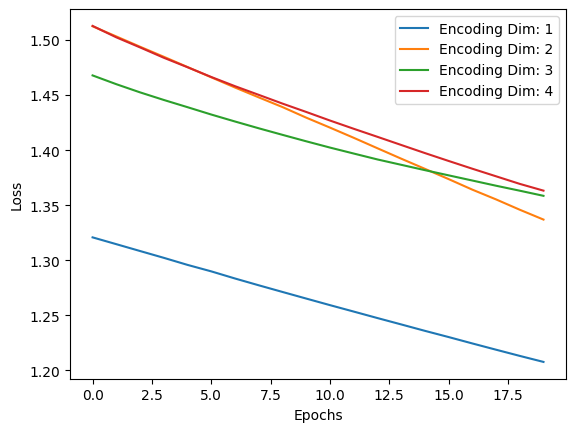

In [130]:
import matplotlib.pyplot as plt

for i in range(4):
    plt.plot(loss[i], label=f'Encoding Dim: {i+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()